## Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Scatter plot and Regression line

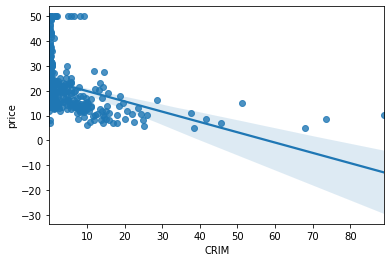

In [6]:
# ; 으로 plt.show() 대체 가능
sns.regplot(x='CRIM', y='price', data=df);

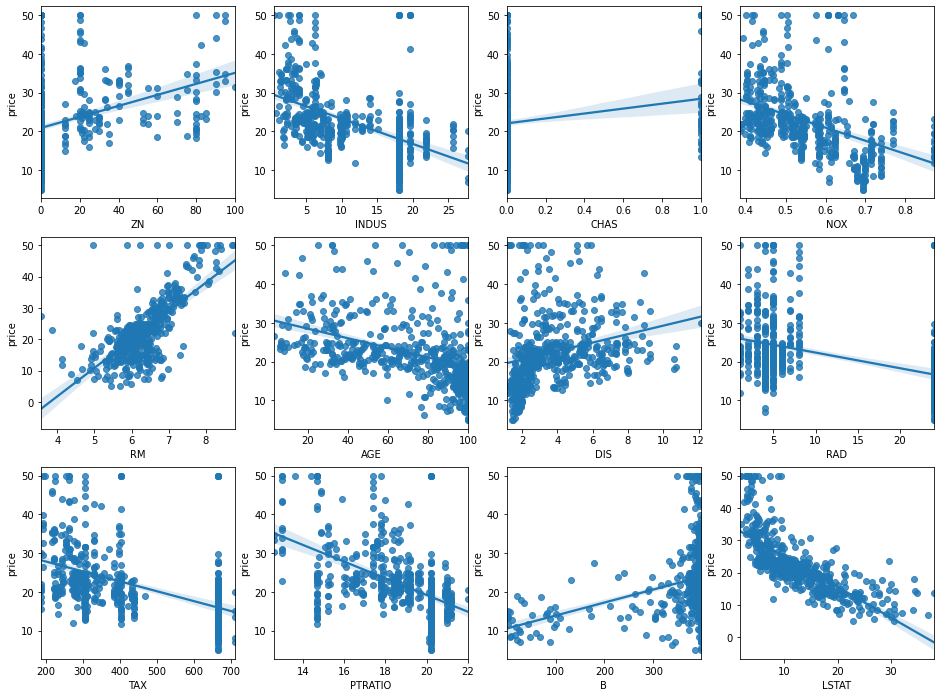

In [9]:
# subplot = matplotlib, subplots = seaborn
_, axs = plt.subplots(3, 4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[1:-1]):
    row, col = idx // 4, idx % 4 # 4로 나눈 몫과 나머지
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])
plt.show()

- R squared

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, boston.target)
    score = lr.score(X, boston.target)
    print(f"{feature}:\t{score:.4f}")

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


### Multiple Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# R-squared
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7444811414684592, 0.6739859403280908)

In [18]:
# weights
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [19]:
# bias
lr.intercept_

30.95081492420092

In [20]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]),
 20.1)

In [21]:
# Weights 와 bias를 이용해 직접 구한 값
np.dot(lr.coef_, X_test[0]) + lr.intercept_

21.227539118774903

In [22]:
lr.predict(X_test[0].reshape(1, -1))

array([21.22753912])

In [24]:
for i in range(10):
    pred_1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    pred_2 = lr.predict(X_test[i].reshape(1, -1))
    print(f'실제값: {y_test[i]}, \t 직접계산 예측값: {pred_1:.4f}, \t Linear Regression 예측값: {pred_2[0]:.4f}')

실제값: 20.1, 	 직접계산 예측값: 21.2275, 	 Linear Regression 예측값: 21.2275
실제값: 11.9, 	 직접계산 예측값: 7.0638, 	 Linear Regression 예측값: 7.0638
실제값: 20.6, 	 직접계산 예측값: 21.4743, 	 Linear Regression 예측값: 21.4743
실제값: 33.2, 	 직접계산 예측값: 35.7832, 	 Linear Regression 예측값: 35.7832
실제값: 20.8, 	 직접계산 예측값: 18.2366, 	 Linear Regression 예측값: 18.2366
실제값: 13.5, 	 직접계산 예측값: 13.4321, 	 Linear Regression 예측값: 13.4321
실제값: 24.7, 	 직접계산 예측값: 24.7007, 	 Linear Regression 예측값: 24.7007
실제값: 13.9, 	 직접계산 예측값: 13.0563, 	 Linear Regression 예측값: 13.0563
실제값: 10.4, 	 직접계산 예측값: 6.3579, 	 Linear Regression 예측값: 6.3579
실제값: 19.7, 	 직접계산 예측값: 13.6734, 	 Linear Regression 예측값: 13.6734


#### Linear Regression, DecisionTree, SVM, RandomForest, XGBoost

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# Linear Regresiion
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

In [28]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=2022)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [29]:
pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)

In [30]:
# SVM
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)

SVR()

In [31]:
pred_sv = sv.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2022)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2022)

In [33]:
pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

In [34]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=2022)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
pred_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)

#### 비교

In [37]:
print('LR\tDT\tSVM\tRF\tXGB')
print(f'{r2_lr:.4f}\t{r2_dt:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}')
print(f'{mse_lr:.4f}\t{mse_dt:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xgb:.4f}')

LR	DT	SVM	RF	XGB
0.6740	0.8359	0.2758	0.8174	0.7691
27.3672	13.7735	60.7889	15.3267	19.3798


In [39]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DT':pred_dt, 'SVM':pred_sv, 'RF':pred_rf, 'XGB':pred_xgb
})
df.head()

,y_test,LR,DT,SVM,RF,XGB
0,20.1,21.227539,19.3,20.644693,19.934,19.616213
1,11.9,7.063817,13.8,16.130347,12.616,14.802561
2,20.6,21.474262,20.6,17.155498,21.612,20.054447
3,33.2,35.783213,33.2,24.229946,35.803,33.186317
4,20.8,18.236587,21.9,15.514814,20.495,18.820538
